In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [19]:

base_path = '/home/admin1/Downloads/crop/' 
IMG_SIZE = 100  
BATCH_SIZE = 32


In [21]:


datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    base_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical', # CHANGE: Multiple classes instead of binary
    subset='training'
)

val_generator = datagen.flow_from_directory(
    base_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical', # CHANGE: Multiple classes
    subset='validation'
)

Found 4080 images belonging to 2 classes.
Found 1019 images belonging to 2 classes.


In [25]:
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout

num_classes = train_generator.num_classes 


model = Sequential([
    Input(shape=(IMG_SIZE, IMG_SIZE, 3)), 
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.3),
    
    Dense(256, activation='relu'),
    
   
    Dense(num_classes, activation='softmax') 
])


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

# 4. TRAINING 
history = model.fit(
    train_generator,
    validation_data=val_generator, 
    epochs=10
)

Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 19s 146ms/step - accuracy: 0.5310 - loss: 6.7720 - val_accuracy: 0.5496 - val_loss: 0.6538
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - accuracy: 0.5694 - loss: 0.6687 - val_accuracy: 0.5780 - val_loss: 0.6417
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 19s 145ms/step - accuracy: 0.6081 - loss: 0.6291 - val_accuracy: 0.5672 - val_loss: 0.6485
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - accuracy: 0.5578 - loss: 0.6626 - val_accuracy: 0.6133 - val_loss: 0.6214
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 19s 145ms/step - accuracy: 0.5723 - loss: 0.6425 - val_accuracy: 0.6133 - val_loss: 0.6172
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - accuracy: 0.5959 - loss: 0.6384 - val_accuracy: 0.6143 - val_loss: 0.6152
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 18s 143ms/step - accuracy: 0.5928 - loss: 0.6354 - val_accuracy: 0.6133 - val_loss: 0.6211
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 19s 148ms/step - accuracy: 0.5968 - loss: 0

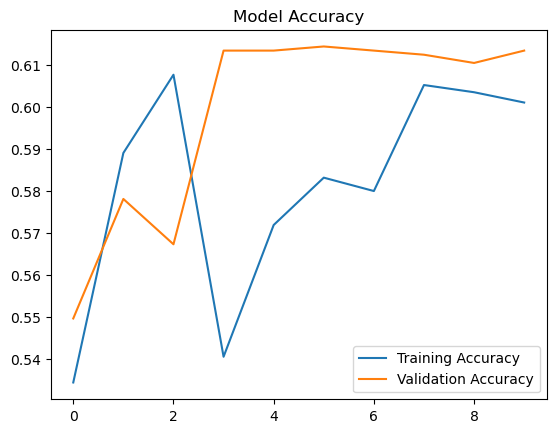

Model Accuracy : [0.5495584011077881, 0.5780176520347595, 0.5672227740287781, 0.6133463978767395, 0.6133463978767395, 0.6143277883529663, 0.6133463978767395, 0.6123650670051575, 0.6104023456573486, 0.6133463978767395]


In [27]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

print(f"Model Accuracy : {history.history['val_accuracy']}")

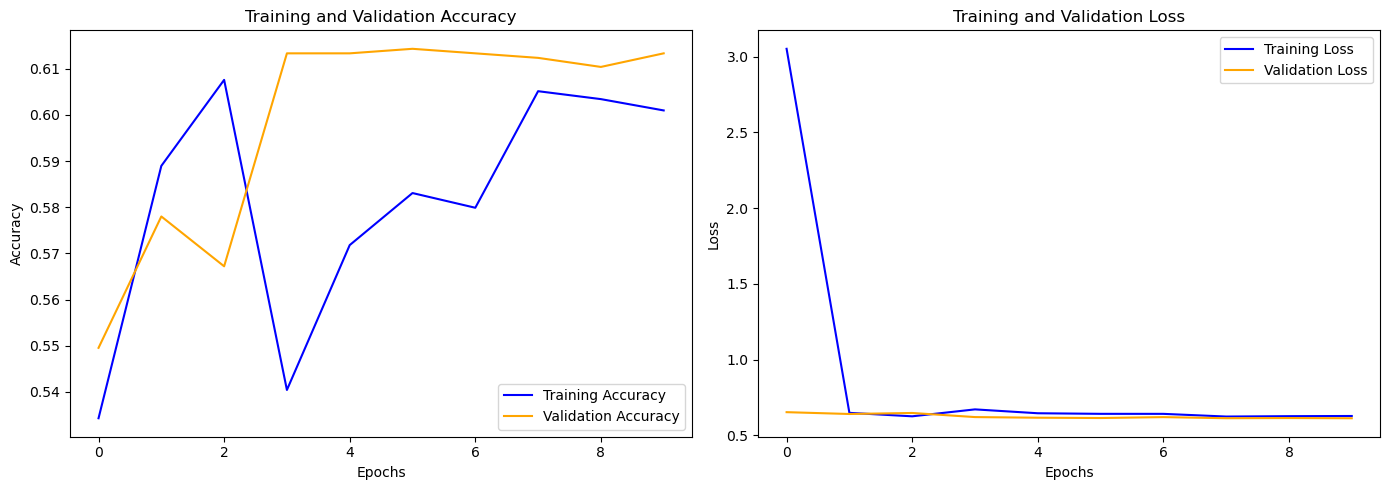

In [29]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()